# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))
print('Feature names: ',feature_names)

Loaded feature names: 126
Feature names:  ['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=pur

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

For k= 1
Explained variance ratio: 
 [ 0.16404331]


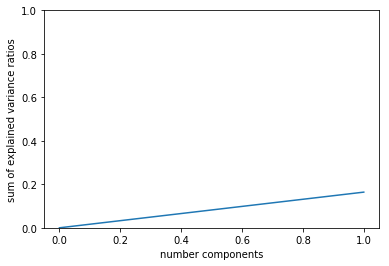

For k= 2
Explained variance ratio: 
 [ 0.16404331  0.13323479]


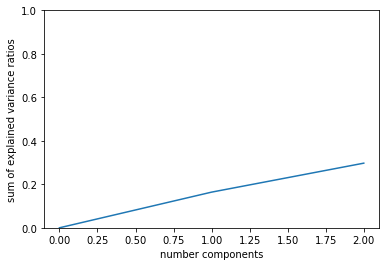

For k= 3
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457]


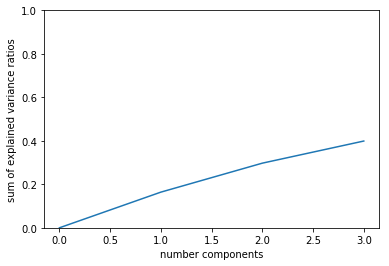

For k= 4
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356]


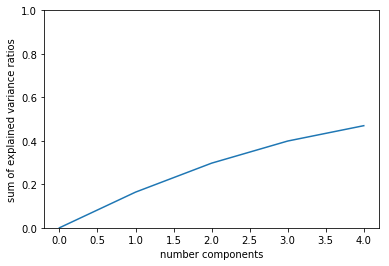

For k= 5
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646]


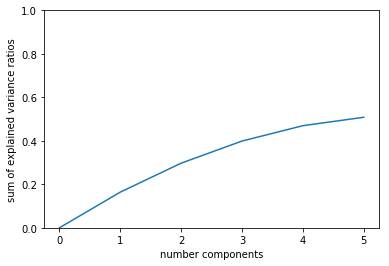

For k= 6
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866645  0.03680798]


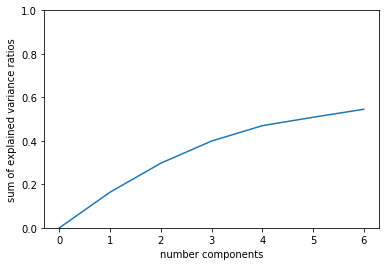

For k= 7
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866645  0.03680803
  0.03128235]


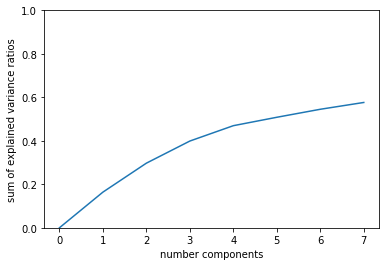

For k= 8
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680803
  0.03128217  0.02733702]


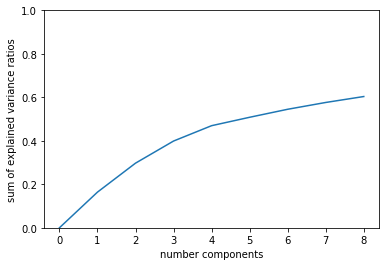

For k= 9
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128237  0.02733737  0.02616489]


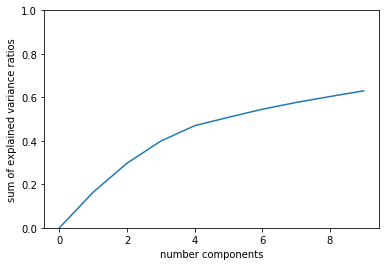

For k= 10
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128238  0.02733734  0.02616483  0.0223068 ]


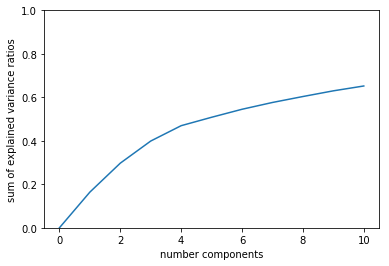

For k= 11
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733736  0.02616467  0.02230928  0.02048133]


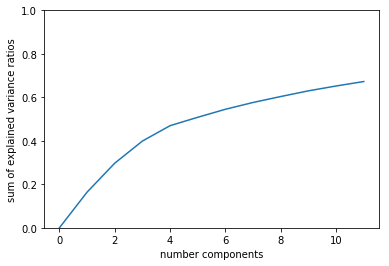

For k= 12
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230941  0.02048122  0.01868297]


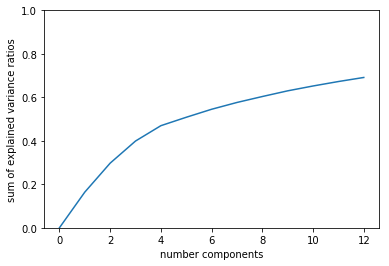

For k= 13
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173456  0.07063356  0.03866637  0.03680793
  0.03128219  0.02733604  0.02615251  0.02230517  0.02047586  0.0186662
  0.01727288]


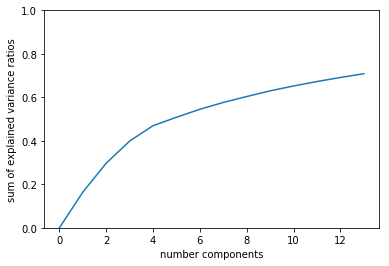

For k= 14
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866645  0.03680791
  0.03128189  0.02733678  0.02616439  0.02230703  0.02046827  0.01861778
  0.01728908  0.01682527]


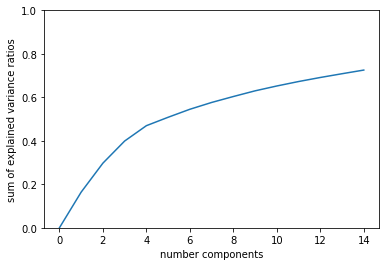

For k= 15
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866641  0.03680794
  0.03128234  0.02733711  0.02616391  0.02230522  0.02047852  0.01861267
  0.01732929  0.01681564  0.01517251]


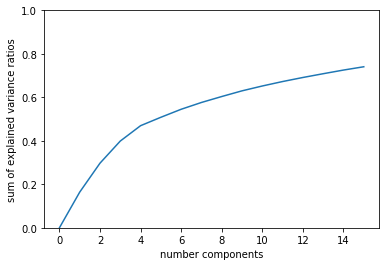

For k= 16
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866635  0.03680794
  0.03128223  0.02733716  0.02616432  0.02230879  0.02047938  0.01867146
  0.01733616  0.01673945  0.01512309  0.01493501]


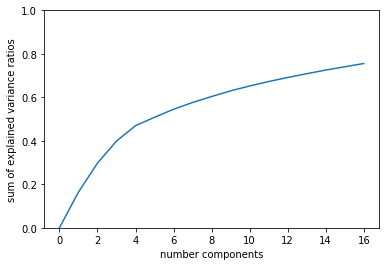

For k= 17
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866645  0.03680803
  0.03128235  0.02733735  0.02616474  0.02230932  0.02048053  0.01868134
  0.01733823  0.01684149  0.01518369  0.01507758  0.01427879]


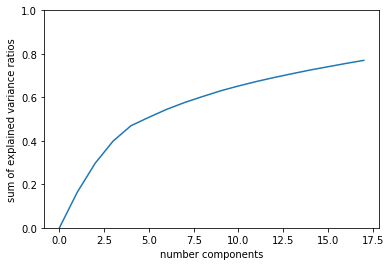

For k= 18
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128227  0.02733713  0.02616434  0.02230903  0.02048096  0.01868073
  0.01732576  0.01683633  0.01518033  0.01508391  0.01426991  0.01408055]


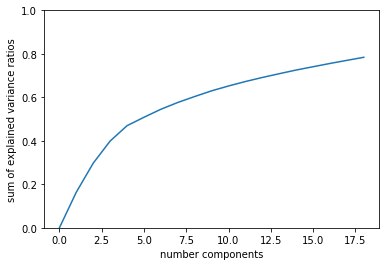

For k= 19
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680803
  0.03128239  0.02733729  0.02616438  0.02230937  0.02047779  0.01868078
  0.01734027  0.01683254  0.01517973  0.01506424  0.01425588  0.01407656
  0.01320516]


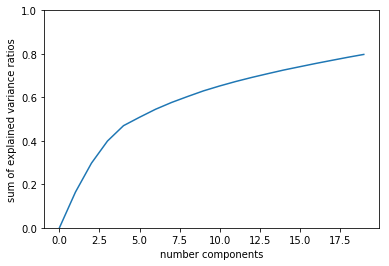

For k= 20
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680803
  0.03128229  0.02733732  0.02616479  0.0223089   0.02048042  0.01868305
  0.01734156  0.01684224  0.01518565  0.01506905  0.01428612  0.01411165
  0.01324138  0.01144583]


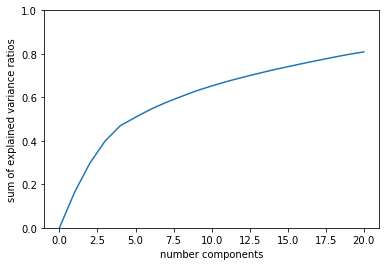

For k= 21
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128238  0.02733736  0.02616484  0.02230931  0.02048116  0.01868306
  0.01734349  0.01684293  0.01518681  0.01508248  0.01429058  0.01411938
  0.01324497  0.01142195  0.01067336]


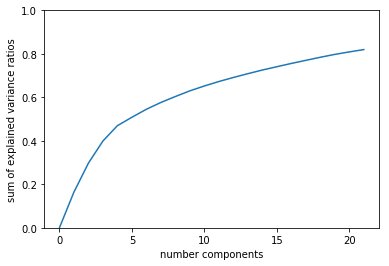

For k= 22
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.02616489  0.02230927  0.02048156  0.01868305
  0.01734395  0.01684289  0.01518462  0.01508479  0.01428554  0.01411658
  0.01324675  0.01145325  0.01069503  0.01064878]


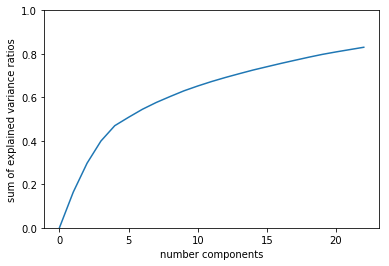

For k= 23
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733732  0.02616489  0.02230941  0.02048172  0.01868301
  0.01734284  0.01684261  0.01518637  0.01508541  0.01428627  0.01411734
  0.01323752  0.01144375  0.01070131  0.01065049  0.01037446]


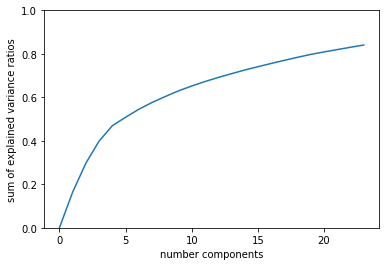

For k= 24
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230941  0.02048161  0.01868301
  0.01734386  0.01684354  0.01518701  0.01508556  0.01428833  0.01411909
  0.01324943  0.01145596  0.01070125  0.01064424  0.0104017   0.0099301 ]


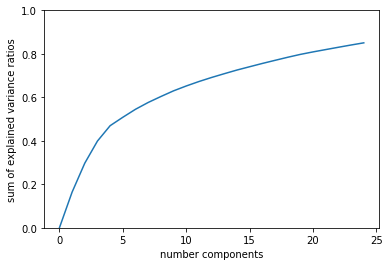

For k= 25
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230938  0.02048171  0.01868309
  0.01734378  0.01684318  0.01518803  0.01508597  0.01429099  0.01411967
  0.01324997  0.01146103  0.01070433  0.01065656  0.01039612  0.00993635
  0.00904094]


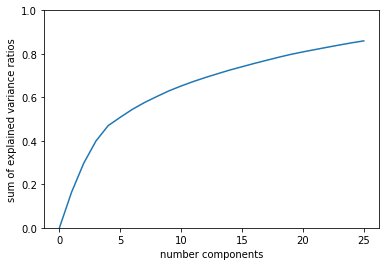

For k= 26
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230941  0.02048172  0.01868326
  0.01734409  0.01684342  0.01518812  0.01508597  0.01429098  0.01411998
  0.01324989  0.0114629   0.01070905  0.01064654  0.01040716  0.00993599
  0.00907761  0.00868816]


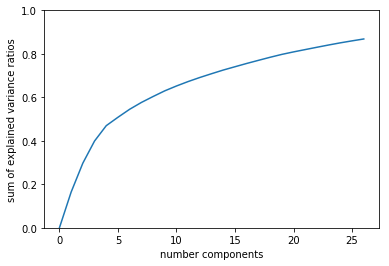

For k= 27
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048171  0.01868328
  0.01734405  0.01684349  0.01518806  0.01508608  0.01429053  0.01411932
  0.01324802  0.01145783  0.01071017  0.01065491  0.01039013  0.00993065
  0.00907567  0.00864324  0.0079022 ]


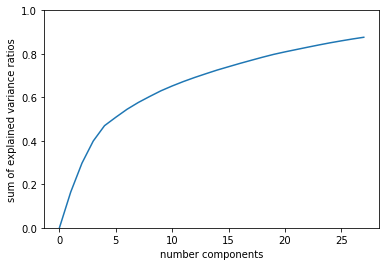

For k= 28
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230941  0.0204817   0.01868301
  0.01734421  0.01684346  0.01518813  0.0150859   0.01429098  0.01411996
  0.01324988  0.01146257  0.01070842  0.01065101  0.01040901  0.00993569
  0.00904677  0.00868743  0.00794194  0.0077399 ]


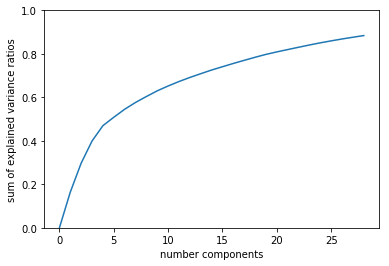

For k= 29
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048171  0.01868329
  0.01734416  0.01684356  0.01518804  0.01508614  0.01429127  0.01411987
  0.01325022  0.01146356  0.01070741  0.01065719  0.01040823  0.00993293
  0.00907801  0.00868854  0.00794365  0.00771625  0.00734117]


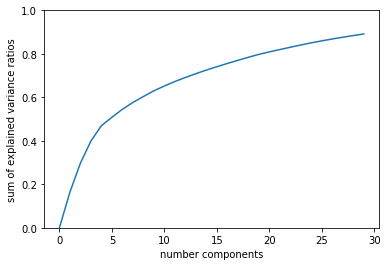

For k= 30
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048173  0.0186833
  0.01734419  0.01684357  0.01518817  0.01508614  0.0142913   0.01411999
  0.01325032  0.01146352  0.01071043  0.0106558   0.01040854  0.00993628
  0.00907812  0.00868867  0.00795249  0.00774928  0.00735858  0.00699537]


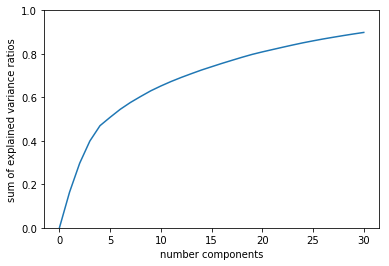

For k= 31
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048173  0.0186833
  0.01734422  0.0168436   0.01518815  0.01508614  0.01429121  0.01412005
  0.01325041  0.01146344  0.0107094   0.01065686  0.0104092   0.00993619
  0.00908011  0.00868767  0.00795476  0.00775696  0.00736902  0.0069643
  0.00639033]


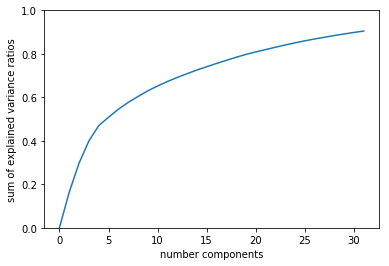

For k= 32
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048173  0.0186833
  0.01734418  0.01684355  0.01518801  0.01508611  0.01429132  0.01412005
  0.01325031  0.0114633   0.01070854  0.0106563   0.01040596  0.00993444
  0.00907951  0.00868938  0.00794964  0.00774232  0.00737358  0.00699206
  0.00636566  0.00600294]


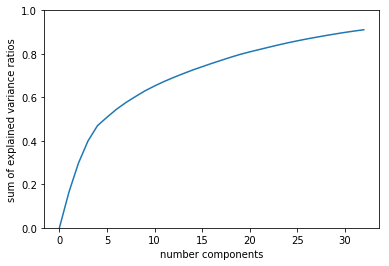

For k= 33
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230942  0.02048173  0.0186833
  0.01734422  0.0168436   0.01518818  0.01508617  0.01429129  0.01412011
  0.01325041  0.01146268  0.01071052  0.01065585  0.01040943  0.00993671
  0.00908002  0.00869253  0.00795396  0.00775342  0.00737089  0.0069863
  0.00640709  0.00614238  0.00568308]


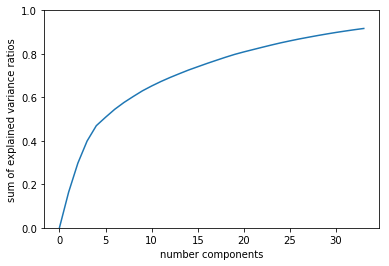

For k= 34
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.0168436   0.01518817  0.01508617  0.0142913   0.01412003
  0.01325044  0.01146373  0.01071045  0.01065719  0.01040944  0.00993638
  0.0090803   0.00869154  0.00795229  0.00775528  0.0073732   0.00699612
  0.00639806  0.00613502  0.00571448  0.0053305 ]


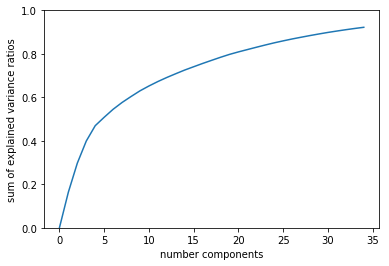

For k= 35
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.0168436   0.01518818  0.01508618  0.01429133  0.01412013
  0.01325043  0.01146377  0.01071063  0.01065743  0.01040946  0.00993679
  0.00908048  0.00869308  0.00795552  0.0077578   0.00737522  0.00699939
  0.00641119  0.0061442   0.00572097  0.00533134  0.00523234]


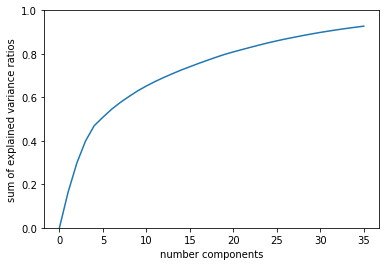

For k= 36
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429132  0.01412012
  0.01325043  0.01146377  0.01071065  0.01065745  0.01040967  0.00993688
  0.00908018  0.00869313  0.00795462  0.0077581   0.00737547  0.00699997
  0.00640973  0.00614365  0.00571495  0.00532845  0.00525174  0.00502146]


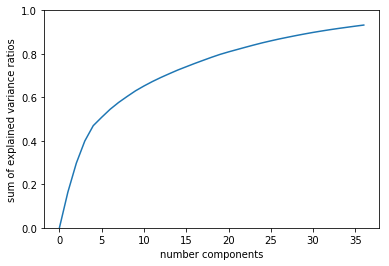

For k= 37
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429133  0.01412013
  0.01325045  0.01146379  0.01071065  0.01065745  0.01040966  0.00993698
  0.00908068  0.00869322  0.00795614  0.00775806  0.00737559  0.00700266
  0.00641216  0.0061448   0.00572242  0.00533509  0.00525855  0.00502403
  0.00498651]


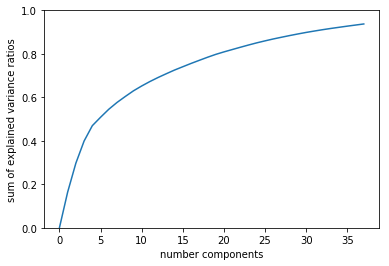

For k= 38
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429133  0.01412013
  0.01325045  0.01146378  0.01071065  0.01065746  0.01040967  0.00993697
  0.0090807   0.00869316  0.00795614  0.00775819  0.00737567  0.00700224
  0.00641211  0.00614448  0.0057231   0.00533353  0.00525884  0.0050245
  0.00498873  0.00455809]


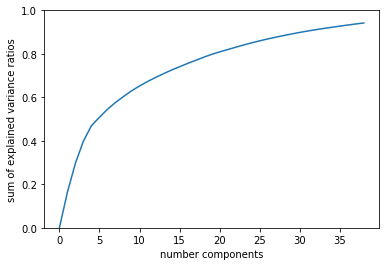

For k= 39
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429133  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065746  0.01040966  0.00993698
  0.00908069  0.00869325  0.00795613  0.00775824  0.00737564  0.00700268
  0.00641228  0.00614483  0.00572303  0.00533604  0.00525923  0.00502644
  0.0049903   0.00455112  0.00452705]


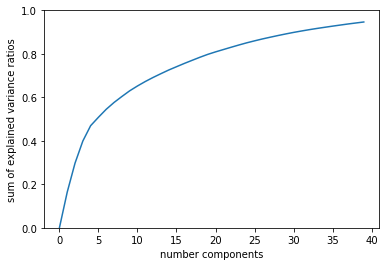

For k= 40
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065746  0.01040967  0.00993698
  0.00908069  0.00869326  0.00795615  0.00775824  0.00737565  0.00700275
  0.0064123   0.00614506  0.00572303  0.00533597  0.00525906  0.00502672
  0.00499024  0.00455896  0.00452711  0.00439711]


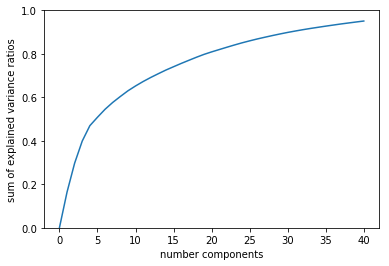

For k= 41
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993698
  0.0090807   0.00869326  0.00795615  0.00775824  0.00737568  0.00700275
  0.00641233  0.00614483  0.00572342  0.00533628  0.005259    0.0050267
  0.00498933  0.00455907  0.0045274   0.00439786  0.00419413]


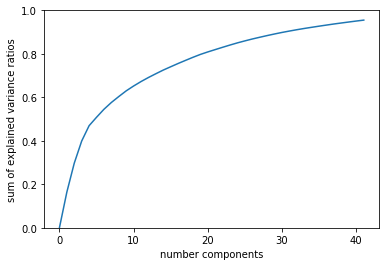

For k= 42
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993698
  0.0090807   0.00869326  0.00795617  0.00775824  0.0073757   0.00700276
  0.00641231  0.00614513  0.00572345  0.00533629  0.00525935  0.00502672
  0.00499036  0.00455933  0.00452782  0.00439784  0.00419481  0.00397651]


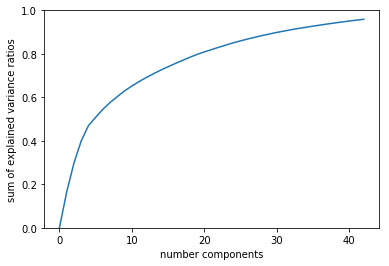

For k= 43
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429133  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795616  0.00775819  0.00737569  0.00700276
  0.00641231  0.00614511  0.00572333  0.00533628  0.00525931  0.00502664
  0.00499005  0.00455922  0.00452735  0.00439706  0.00419354  0.00397689
  0.00368939]


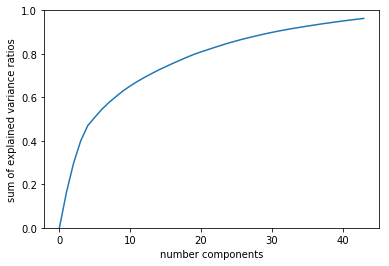

For k= 44
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525935  0.00502673
  0.0049904   0.00455938  0.00452784  0.00439787  0.00419487  0.00397701
  0.00370023  0.00359522]


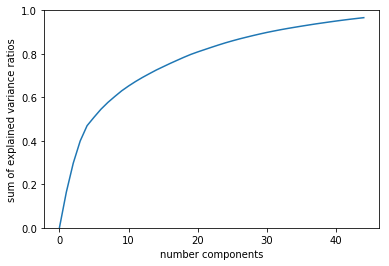

For k= 45
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439785  0.00419488  0.00397702
  0.00370042  0.00359528  0.003381  ]


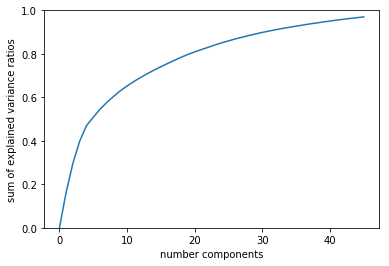

For k= 46
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419489  0.00397702
  0.00370041  0.00359528  0.00338124  0.00298985]


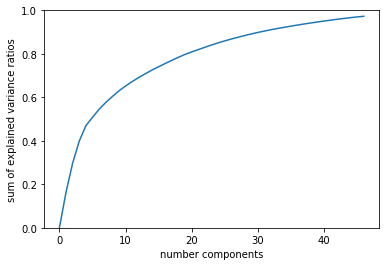

For k= 47
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419489  0.00397702
  0.00370041  0.00359528  0.00338121  0.00298986  0.00272018]


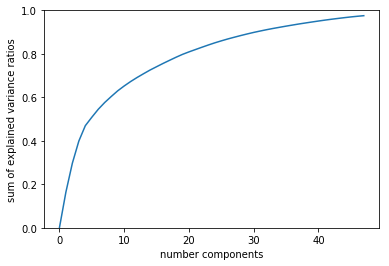

For k= 48
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419489  0.00397702
  0.00370041  0.00359528  0.00338124  0.00298985  0.00272031  0.00235689]


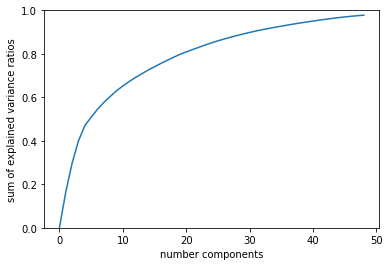

For k= 49
Explained variance ratio: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419488  0.00397702
  0.00370042  0.00359528  0.0033812   0.00298983  0.00272029  0.00235705
  0.00221371]


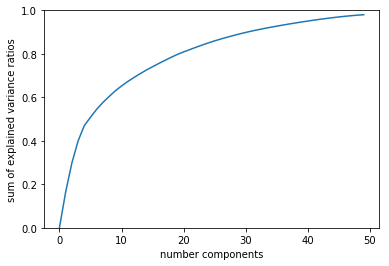

In [175]:
def P1():
### STUDENT START ###

    for k in range(1,50):

        n_comp = k
        pca = PCA(n_components = n_comp)
        pca.fit(train_data)
        new_pca_features = pca.transform(train_data)

        print("For k=",k)
        print ('Explained variance ratio: \n', pca.explained_variance_ratio_) 
        #print ('Cumulative explained variance: \n', np.cumsum(pca.explained_variance_ratio_))
        #print ('PCA components: \n', pca.components_)    
        #print('Explained variance: \n',pca.explained_variance_)

        evr = pca.explained_variance_ratio_
        s_evr = np.cumsum(np.concatenate(([0], evr)))

        plt.plot(range(n_comp+1),s_evr)
        plt.xlabel('number components')
        plt.ylabel('sum of explained variance ratios')
        plt.ylim([0,1])
        plt.show()
    
### STUDENT END ###

P1()

ANSWER: As presented in the charts, with 4 principal components is possible to explain most of the variance ratios.
    
    For k= 4
    Explained variance ratio: 
     [ 0.16404331  0.13323479  0.10173457  0.07063356]

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html


Orginal shape (7000, 126)
Reduced shape (7000, 2) 

Explained variance ratio: 
 [ 0.16404331  0.13323479]
Cumulative explained variance: 
 [ 0.16404331  0.2972781 ]
Train labels: 
 [1 0 0 ..., 1 0 0]


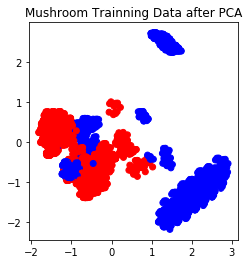

In [176]:
def P2():
### STUDENT START ###
    
    n_comp = 2
    pca = PCA(n_components = n_comp)
    pca.fit(train_data)
    new_pca_features = pca.transform(train_data)
    
    print("\nOrginal shape",train_data.shape)
    print("Reduced shape",new_pca_features.shape,"\n")

    print ('Explained variance ratio: \n', pca.explained_variance_ratio_) 
    print ('Cumulative explained variance: \n', np.cumsum(pca.explained_variance_ratio_))
    print ('Train labels: \n', train_labels)
     
    colors=[]
    
    for c in range(len(train_labels)):
        if train_labels[c]==0:
            colors.append('r')
        else:
            colors.append('b')      
              
        
    p = plt.subplot()       
    
    p.scatter(new_pca_features[:, 0], new_pca_features[:, 1],c=colors)
    p.set_aspect('equal')
    p.set_title("Mushroom Trainning Data after PCA")
    
    plt.show()
    
             
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

For k= 1 :


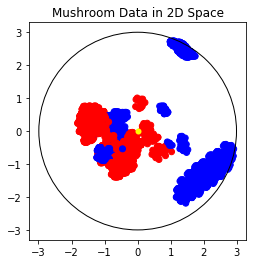

For k= 2 :


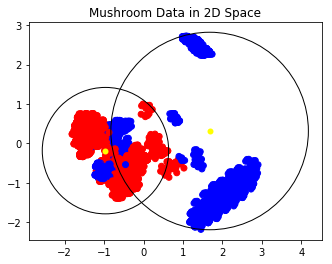

For k= 3 :


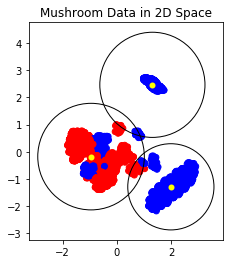

For k= 4 :


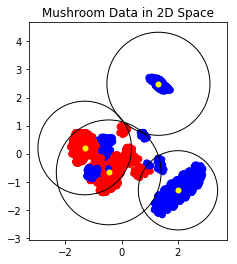

For k= 5 :


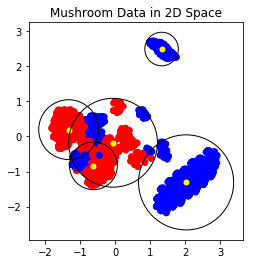

For k= 6 :


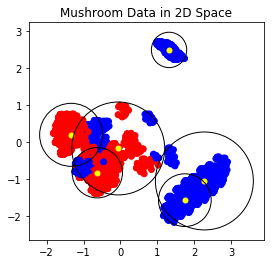

For k= 7 :


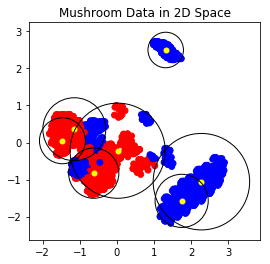

For k= 8 :


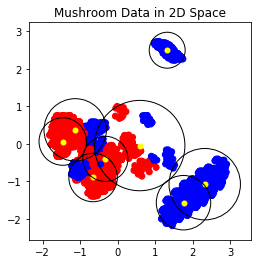

For k= 9 :


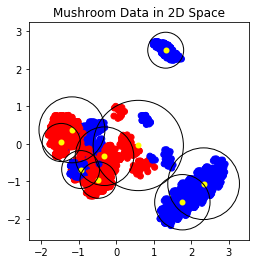

For k= 10 :


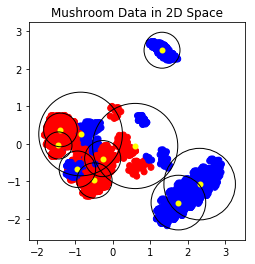

For k= 11 :


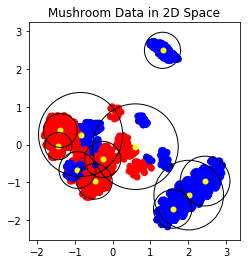

For k= 12 :


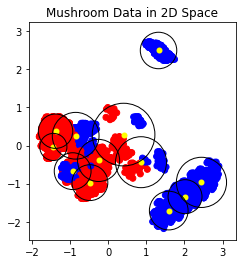

For k= 13 :


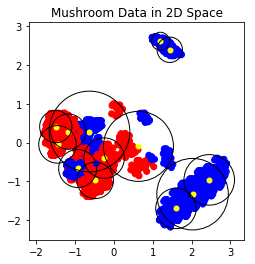

For k= 14 :


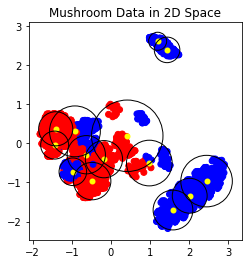

For k= 15 :


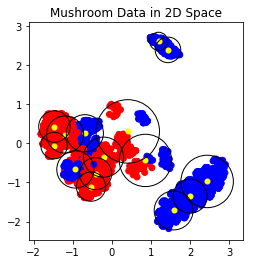

In [177]:
def P3():
### STUDENT START ###

    n_comp=2
    pca=PCA(n_components = n_comp)
    new_pca_features=pca.fit_transform(train_data)


    for k in range (1,16): 
        
        print("For k=",k,":")
        
        km = KMeans(n_clusters=k)
        clstrs=km.fit_transform(new_pca_features)        
        centers=km.cluster_centers_
        clusterpred = km.labels_
        
        #print ('Clusters Shape: \n',km.cluster_centers_.shape)
        #print ('Centroids: \n',km.cluster_centers_)
        #print("Cluster Membership: \n",km.labels_)

        colors=[]

        for c in range(len(train_labels)):
            if train_labels[c]==0:
                colors.append('r')
            else:
                colors.append('b')

        p = plt.subplot()       
        p.scatter(new_pca_features[:, 0], new_pca_features[:, 1],c=colors)
        p.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],marker=".",c="yellow",linewidths=3) 
        p.set_aspect('equal')
        p.set_title("Mushroom Trainning Data after PCA")
        
        
        for c in range(k): 
        
        # create temporary array of all points in the specified cluster  
            currentCluster = clstrs[clusterpred == c]
        
        # set the radius of the circle to the largest distance between center and any point within the cluster
            radiusCluster = np.max(currentCluster[:,c])
        
        # plot circle with centered at center of cluster with calculated radius
            circle = plt.Circle(centers[c], radius=radiusCluster, fill=False)
            plt.gca().add_patch(circle)
            plt.title('Mushroom Data in 2D Space') 
        
        plt.axis('scaled')
        plt.show()

        
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').


For  1  component(s) and  spherical matrix type:
Estimated mean(s) [[ 1.14644163  0.21592866]]
Estimated covariances [ 2.08905941]


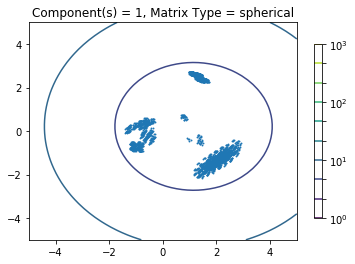


For  1  component(s) and  diag matrix type:
Estimated mean(s) [[ 1.14644163  0.21592866]]
Estimated covariances [[ 1.28673198  2.89138685]]


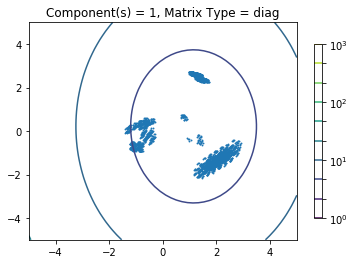


For  1  component(s) and  tied matrix type:
Estimated mean(s) [[ 1.14644163  0.21592866]]
Estimated covariances [[ 1.28673198 -0.23166588]
 [-0.23166588  2.89138685]]


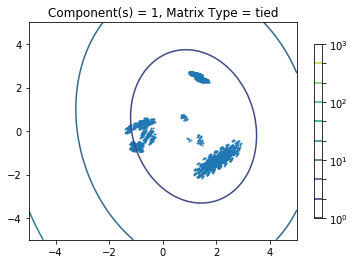


For  1  component(s) and  full matrix type:
Estimated mean(s) [[ 1.14644163  0.21592866]]
Estimated covariances [[[ 1.28673198 -0.23166588]
  [-0.23166588  2.89138685]]]


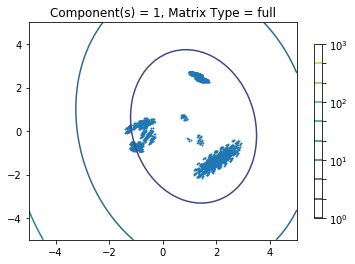


For  2  component(s) and  spherical matrix type:
Estimated mean(s) [[ 1.31864841  2.49736871]
 [ 1.06124212 -0.91281655]]
Estimated covariances [ 0.01980239  1.17724623]


C:\Users\ursul\Anaconda3\lib\site-packages\matplotlib\contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


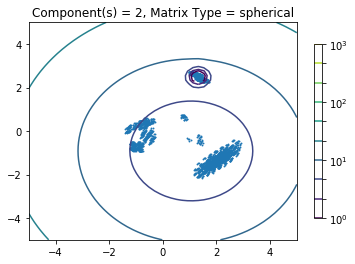


For  2  component(s) and  diag matrix type:
Estimated mean(s) [[ 2.02816242 -1.32760071]
 [ 0.52242907  1.30831725]]
Estimated covariances [[ 0.12110745  0.09691383]
 [ 1.17207274  1.98964819]]


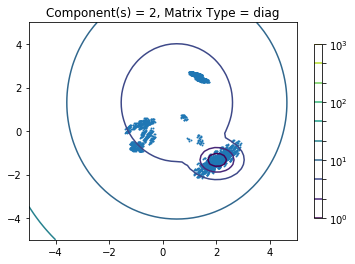


For  2  component(s) and  tied matrix type:
Estimated mean(s) [[ 1.06096569 -0.91518827]
 [ 1.31882221  2.49706854]]
Estimated covariances [[ 1.27199758 -0.42664846]
 [-0.42664846  0.3111509 ]]


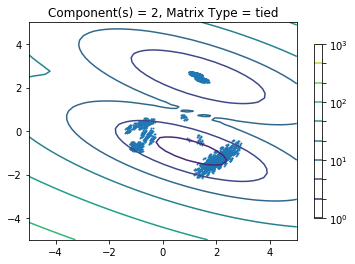


For  2  component(s) and  full matrix type:
Estimated mean(s) [[ 1.06095269 -0.91511664]
 [ 1.31887123  2.4972257 ]]
Estimated covariances [[[ 1.89102375 -0.63042425]
  [-0.63042425  0.45731783]]

 [[ 0.02341407 -0.01576656]
  [-0.01576656  0.01629169]]]


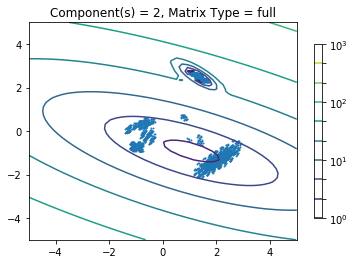


For  3  component(s) and  spherical matrix type:
Estimated mean(s) [[-0.76098784 -0.16496695]
 [ 1.31887123  2.4972257 ]
 [ 2.01522202 -1.30801906]]
Estimated covariances [ 0.21172647  0.01985288  0.12908585]


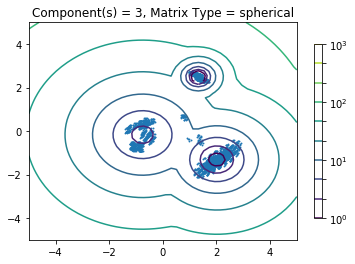


For  3  component(s) and  diag matrix type:
Estimated mean(s) [[ 1.31887123  2.4972257 ]
 [ 2.01435552 -1.30724273]
 [-0.76369622 -0.1646548 ]]
Estimated covariances [[ 0.02341407  0.01629169]
 [ 0.13818935  0.12142456]
 [ 0.17667798  0.24269109]]


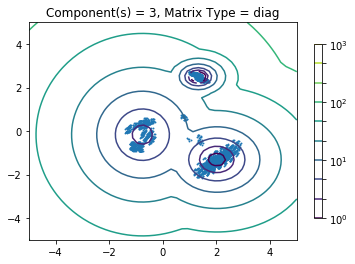


For  3  component(s) and  tied matrix type:
Estimated mean(s) [[ 2.01422001 -1.30712167]
 [-0.76659234 -0.16596463]
 [ 1.31828001  2.4952703 ]]
Estimated covariances [[ 0.10809413  0.05148429]
 [ 0.05148429  0.11533233]]


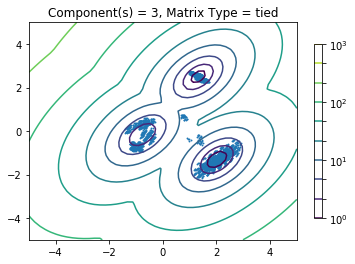


For  3  component(s) and  full matrix type:
Estimated mean(s) [[-0.6812923  -0.17410559]
 [ 2.02970952 -1.32714796]
 [ 1.31887122  2.4972257 ]]
Estimated covariances [[[ 0.33530063  0.07355912]
  [ 0.07355912  0.23595085]]

 [[ 0.12976553  0.09515095]
  [ 0.09515095  0.10531705]]

 [[ 0.02341407 -0.01576656]
  [-0.01576656  0.01629169]]]


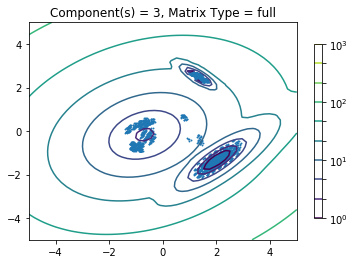


For  4  component(s) and  spherical matrix type:
Estimated mean(s) [[ 1.31887123  2.4972257 ]
 [ 2.01425121 -1.30715105]
 [-0.64513128  0.13441325]
 [-0.98540099 -0.72146565]]
Estimated covariances [ 0.01985288  0.12989323  0.1646938   0.01682009]


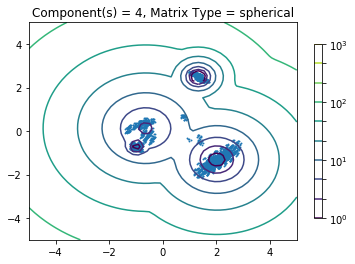


For  4  component(s) and  diag matrix type:
Estimated mean(s) [[-0.74551159 -0.16619049]
 [ 2.25833911 -1.07252073]
 [ 1.31887123  2.4972257 ]
 [ 1.75930051 -1.57250249]]
Estimated covariances [[ 0.20901675  0.24067757]
 [ 0.08497241  0.06280577]
 [ 0.02341407  0.01629169]
 [ 0.05867999  0.04568397]]


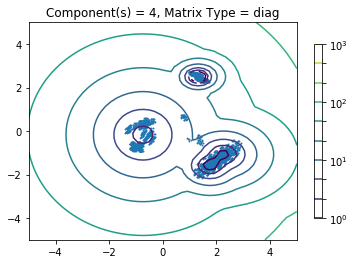


For  4  component(s) and  tied matrix type:
Estimated mean(s) [[-0.84495678 -0.60073392]
 [ 1.31887122  2.49722568]
 [ 2.01694483 -1.30956493]
 [-0.66528164  0.27373855]]
Estimated covariances [[ 0.10916175  0.04327669]
 [ 0.04327669  0.0694196 ]]


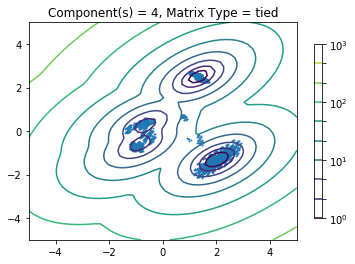


For  4  component(s) and  full matrix type:
Estimated mean(s) [[ 1.31887123  2.4972257 ]
 [ 2.02996761 -1.32722342]
 [-0.83596933 -0.20177757]
 [ 1.05688585  0.10212991]]
Estimated covariances [[[ 0.02341407 -0.01576656]
  [-0.01576656  0.01629169]]

 [[ 0.12982738  0.09527937]
  [ 0.09527937  0.10538958]]

 [[ 0.06767669  0.04105774]
  [ 0.04105774  0.22188144]]

 [[ 0.09558765 -0.16248214]
  [-0.16248214  0.32636702]]]


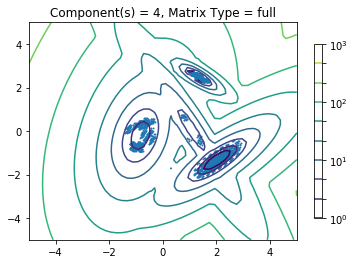

In [178]:
def P4():
### STUDENT START ###
        
    n_comp=2
    pca=PCA(n_components = n_comp)
    new_pca_features=pca.fit_transform(train_data)
    
    #Only poisonous data
    positive=new_pca_features[train_labels==1]
    
    matrix_type=['spherical', 'diag', 'tied', 'full']
    
    for comps in range(1,5):
        
        for covartype in range(len(matrix_type)): 
        
            gm_mod = GaussianMixture(n_components = comps, covariance_type=matrix_type[covartype])
            gm_mod.fit(positive)
            y_hat = gm_mod.predict(positive)

            print("\nFor ",comps," component(s) and ",matrix_type[covartype],"matrix type:")
            print("Estimated mean(s)",gm_mod.means_)
            print("Estimated covariances",gm_mod.covariances_)
            
            # display predicted scores by the model as a contour plot
            x = np.linspace(-5., 5.)
            y = np.linspace(-5., 5.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gm_mod.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(positive[:, 0], positive[:, 1], .8)

            plt.title('Component(s) = %d, Matrix Type = %s' %(comps,matrix_type[covartype])) 
            plt.show()


### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GaussianMixture.score_samples). What is the accuracy?

In [180]:
def P5():
### STUDENT START ###

    #Train data PCA transformation
    n_comp=2
    pca=PCA(n_components = n_comp)
    new_pca_features=pca.fit_transform(train_data)
    
    #Only poisonous train data
    positive=new_pca_features[train_labels==1]
    
    #Only non poisonous train data
    negative=new_pca_features[train_labels==0]        
    
    
    #Test data PCA transformation for prediction and accuracy
    n_comp=2
    test_pca=PCA(n_components = n_comp)
    test_new_pca_features=pca.fit_transform(test_data)
     
    
    #Poisonous fit and test data prediction     
    gm_pos = GaussianMixture(n_components = 4, covariance_type="full")
    pos_gm=gm_pos.fit(positive)    
    print("\nProbability with only Poisonous data:\n",pos_gm.score_samples(test_new_pca_features))
    

    #Non Poisonous fit and test data prediction
    gm_neg = GaussianMixture(n_components = 4, covariance_type="full")
    neg_gm = gm_neg.fit(negative)        
    print("\nProbability with only Non Poisonous data:\n",neg_gm.score_samples(test_new_pca_features))
    
    #Accuracy calculation; 1 for Poisonous and 0 for Non Poisonous
    
    pred=[]
    
    
    k=len(pos_gm.score_samples(test_new_pca_features))
    
    for g in range(0,k):
                   
        if pos_gm.score_samples(test_new_pca_features)[g] > neg_gm.score_samples(test_new_pca_features)[g]:
            pred.append(1)
        else:
            pred.append(0)
                                                                                
    print("\nAccuracy:",metrics.accuracy_score(pred,test_labels))                                                                                  
    
        
### STUDENT END ###

P5()


Probability with only Poisonous data:
 [ -5.10360374  -6.8384181   -5.33834258 ..., -52.74695086  -8.25823169
 -14.57131266]

Probability with only Non Poisonous data:
 [ -7.0689308  -10.24918631  -6.26289492 ..., -16.76702682  -2.06390561
 -18.65504853]

Accuracy: 0.508896797153


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [181]:
def P6():
### STUDENT START ###

#We must define the total number of parameters PCA, GMM and each type of covariance matrix should have.
#For this we must discrimanate four different cases, one for each type of matrix, given they differ in number of
#parameters.

#A good way to approach this problem would be with the following formula :

    # (PCA_components + Covariance_parameters ) x GMM components =< 25 (25 because we have two classes)

#Covariance matrix parameters is a function of PCA components, so the formula would be:

    #PCA_components x GMM_components + PCA_components x COV_factor x GMM_components=<25
    
#Which is the same that:

    #PCA_components x GMM_components x (1 + COV_factor)=<25
    
#Assuming that COV_factor would be at least equal to PCA_components, and trying to fufill the superior limit, the
#formula is:

    # PCA_components x GMM_components + (PCA_components)2 =< 25
    
# The values that would fulfill the condition cannot be higher than:

#PCA_components=[1,2,3,4] (5x5 is 25)
#GMM_components=[1,2,3,4,5,6,7,8,9,10],(PCA should be at least 2)    
      
    matrix_type=['spherical', 'diag', 'tied', 'full']
    
    acc=[]
    pca_comp=[]
    gmm_comp=[]
    matrix=[]
    pred=[]
    
    #Iterating over PCA components
    for n_comp in range(1,5):
        
        #Train data PCA transformation
        pca=PCA(n_components = n_comp)
        new_pca_features=pca.fit_transform(train_data)
        
        #Test data PCA transformation for precition and accuracy
        test_pca=PCA(n_components = n_comp)
        test_new_pca_features=pca.fit_transform(test_data)
            
        #Iterating over GMM components
        for comps in range(1,10):
            
            #Iterating over matrix types
            for ct in range(len(matrix_type)): 

                gm_mod = GaussianMixture(n_components = comps, covariance_type=matrix_type[ct])                
                mod = gm_mod.fit(new_pca_features)
                score = mod.score_samples(test_new_pca_features)
                prediction = mod.predict(test_new_pca_features)
                
                #print("\nFor ",n_comp," PCA component(s),",matrix_type[ct]," matrix type, and",comps,"GMM component(s)")
                #print("\nPrediction:\n",prediction)
                #print("\nLength:\n",len(mod.score_samples(test_new_pca_features)))
                
                pca_comp.append(n_comp)
                gmm_comp.append(comps)
                matrix.append(matrix_type[ct])
                pred.append(prediction)             
                acc.append(metrics.accuracy_score(prediction,test_labels))          
                #print("Accuracy:",metrics.accuracy_score(prediction,test_labels))
                
    print("\nHighest Accuracy is :",np.amax(acc),"for ",pca_comp[np.argmax(acc)]," PCA component(s),",matrix[np.argmax(acc)]," matrix type, and",gmm_comp[np.argmax(acc)],"GMM component(s)")

    ### STUDENT END ###
    
#Note: The next step would be to test my hypothesis by going through each type of covariance matrix and it's 
#number of parameters in order to maximize accuracy with the least number of parameters. 

P6()


Highest Accuracy is : 0.733096085409 for  3  PCA component(s), spherical  matrix type, and 2 GMM component(s)
